In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path 

In [11]:
dataset_path = Path('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset')
file_path = list(dataset_path.glob(r'**/*png'))

In [12]:
file_path[0:5]

[WindowsPath('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'),
 WindowsPath('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00002.png'),
 WindowsPath('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00003.png'),
 WindowsPath('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00004.png'),
 WindowsPath('../../../../fadel/Downloads/Compressed/dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00005.png')]

In [13]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], file_path))

In [14]:
df = pd.DataFrame({
    'image':file_path,
    'label':labels
})
df['image'] = df['image'].astype(str)

In [15]:
df.head()

,image,label
0,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat
1,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat
2,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat
3,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat
4,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat


In [16]:
df['label'].value_counts()

Black Sea Sprat          1000
Black Sea Sprat GT       1000
Trout                    1000
Striped Red Mullet GT    1000
Striped Red Mullet       1000
Shrimp GT                1000
Shrimp                   1000
Sea Bass GT              1000
Sea Bass                 1000
Red Sea Bream GT         1000
Red Sea Bream            1000
Red Mullet GT            1000
Red Mullet               1000
Hourse Mackerel GT       1000
Hourse Mackerel          1000
Gilt-Head Bream GT       1000
Gilt-Head Bream          1000
Trout GT                 1000
Name: label, dtype: int64

In [17]:
mask = df['label'].str.contains(r'\b\w*GT\b')
df = df[mask == False]
df['label'].value_counts()

Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: label, dtype: int64

In [18]:
import matplotlib.image as mpimg

In [19]:
my_label = df['label'].unique()
random_img = pd.DataFrame()

for label in my_label:
    group_df = df[df['label'] == label]
    random_row = group_df.sample(n=1)
    random_img = pd.concat([random_img, random_row])
random_img

,image,label
260,..\..\..\..\fadel\Downloads\Compressed\dataset...,Black Sea Sprat
2367,..\..\..\..\fadel\Downloads\Compressed\dataset...,Gilt-Head Bream
4142,..\..\..\..\fadel\Downloads\Compressed\dataset...,Hourse Mackerel
6129,..\..\..\..\fadel\Downloads\Compressed\dataset...,Red Mullet
8249,..\..\..\..\fadel\Downloads\Compressed\dataset...,Red Sea Bream
10562,..\..\..\..\fadel\Downloads\Compressed\dataset...,Sea Bass
12060,..\..\..\..\fadel\Downloads\Compressed\dataset...,Shrimp
14133,..\..\..\..\fadel\Downloads\Compressed\dataset...,Striped Red Mullet
16502,..\..\..\..\fadel\Downloads\Compressed\dataset...,Trout


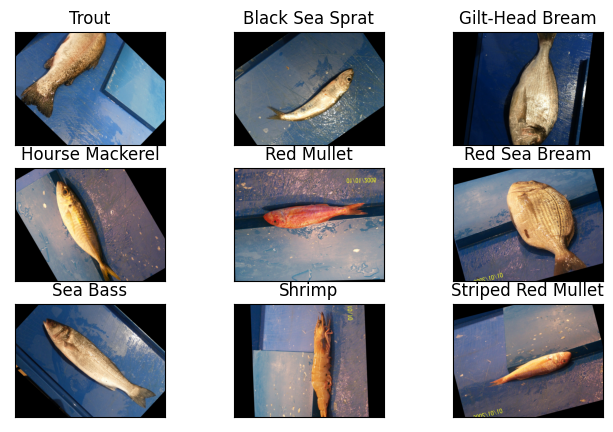

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(random_img.iloc[i-1,0]))
    ax.set_title(random_img.iloc[i-1,1])
    
plt.show()

In [21]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=10)
X, X_val = train_test_split(X_train, test_size=0.2, random_state=10)

In [23]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Validation shape:', X_val.shape)

Train shape: (6300, 2)
Test shape: (2700, 2)
Validation shape: (1260, 2)


In [24]:
image_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

train_generator = image_datagen.flow_from_dataframe(
    dataframe = X_train,
    target_size = (200,200),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    shuffle=False
)

test_generator = image_datagen.flow_from_dataframe(
    dataframe = X_test,
    target_size = (200,200),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    shuffle=False
)

val_generator = image_datagen.flow_from_dataframe(
    dataframe = X_val,
    target_size = (200,200),
    class_mode = 'categorical',
    x_col = 'image',
    y_col = 'label',
    shuffle=False
)

Found 6300 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


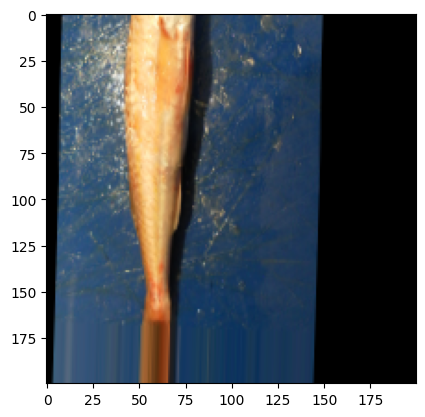

(200, 200, 3)

In [25]:
batch = train_generator.next()
image = batch[0][0]

plt.imshow(image)
plt.show()
image.shape

In [26]:
input_shape = (200,200,3)

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=2, padding='same', activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 99, 99, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 32)      

In [29]:
from keras.optimizers import Adam
optimize = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=callback)

Epoch 1/20
197/197 [==============================] - 127s 608ms/step - loss: 2.0801 - accuracy: 0.1490 - val_loss: 1.6795 - val_accuracy: 0.2619
Epoch 2/20
197/197 [==============================] - 103s 522ms/step - loss: 1.5910 - accuracy: 0.3387 - val_loss: 1.4367 - val_accuracy: 0.4119
Epoch 3/20
197/197 [==============================] - 102s 520ms/step - loss: 1.2299 - accuracy: 0.5008 - val_loss: 0.9414 - val_accuracy: 0.6437
Epoch 4/20
197/197 [==============================] - 111s 563ms/step - loss: 0.9175 - accuracy: 0.6437 - val_loss: 0.7205 - val_accuracy: 0.7127
Epoch 5/20
197/197 [==============================] - 105s 533ms/step - loss: 0.7560 - accuracy: 0.7083 - val_loss: 0.5794 - val_accuracy: 0.7754
Epoch 6/20
197/197 [==============================] - 102s 517ms/step - loss: 0.6882 - accuracy: 0.7343 - val_loss: 0.7005 - val_accuracy: 0.7333
Epoch 7/20
197/197 [==============================] - 102s 515ms/step - loss: 0.5727 - accuracy: 0.7852 - val_loss: 0.4369 -

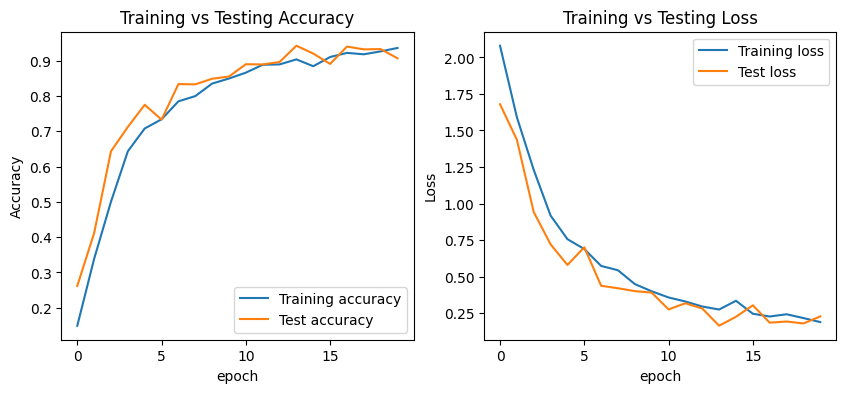

In [32]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, test_acc, label='Test accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, test_loss, label='Test loss')
plt.title('Training vs Testing Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
model.save('fishku.h5')

In [34]:
y_pred = model.predict(test_generator)

85/85 [==============================] - 43s 506ms/step


In [35]:
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([7, 1, 7, ..., 2, 1, 8], dtype=int64)

In [37]:
labels = test_generator.class_indices
labels

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [40]:
labels_reverse = {k : v for v, k in labels.items()}
labels_reverse

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Shrimp',
 7: 'Striped Red Mullet',
 8: 'Trout'}

In [41]:
y_pred_label = [labels_reverse[y] for y in y_pred]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(X_test.label, y_pred_label))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      0.74      0.85       308
   Gilt-Head Bream       0.72      0.81      0.76       313
   Hourse Mackerel       0.84      0.98      0.91       278
        Red Mullet       1.00      0.98      0.99       310
     Red Sea Bream       0.87      0.98      0.92       306
          Sea Bass       0.88      0.68      0.77       327
            Shrimp       1.00      1.00      1.00       262
Striped Red Mullet       0.97      0.99      0.98       288
             Trout       0.90      0.99      0.95       308

          accuracy                           0.90      2700
         macro avg       0.91      0.91      0.90      2700
      weighted avg       0.91      0.90      0.90      2700



In [45]:
print(confusion_matrix(X_test.label, y_pred_label))

[[227   0  50   0   3  23   0   5   0]
 [  0 254   0   0  34   0   0   0  25]
 [  0   0 272   0   0   3   0   0   3]
 [  0   1   0 305   0   0   0   4   0]
 [  0   3   0   0 301   2   0   0   0]
 [  0  94   0   0   6 222   0   0   5]
 [  0   0   0   0   0   0 261   1   0]
 [  0   0   0   0   1   2   0 285   0]
 [  0   2   0   0   0   0   0   0 306]]
